# House Prices - Advanced Regression Techniques

In [1]:
! unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_1=pd.read_csv('/content/train.csv')
df_2=pd.read_csv('/content/test.csv')

if 'SalePrice' not in df_2.columns:
  df_2['SalePrice'] = 0

df = pd.concat([df_1,df_2],axis=0)
df = df.set_index('Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0


In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [8]:
num_features = []
not_num_features = []

for label  , content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    num_features.append(label)
  else:
    not_num_features.append(label)

print("number of numerical features is : ",len(num_features))
print("number of no numerical features is : ",len(not_num_features))

number of numerical features is :  37
number of no numerical features is :  43


In [22]:
df.isna().sum() > 0

,0
MSSubClass,False
MSZoning,True
LotFrontage,True
LotArea,False
Street,False
...,...
MoSold,False
YrSold,False
SaleType,True
SaleCondition,False


In [37]:
df.isnull().sum()[df.isnull().sum()>0]

,0
MSZoning,4
LotFrontage,486
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrArea,23
BsmtQual,81
BsmtCond,82
BsmtExposure,82
BsmtFinType1,79


In [13]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [16]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

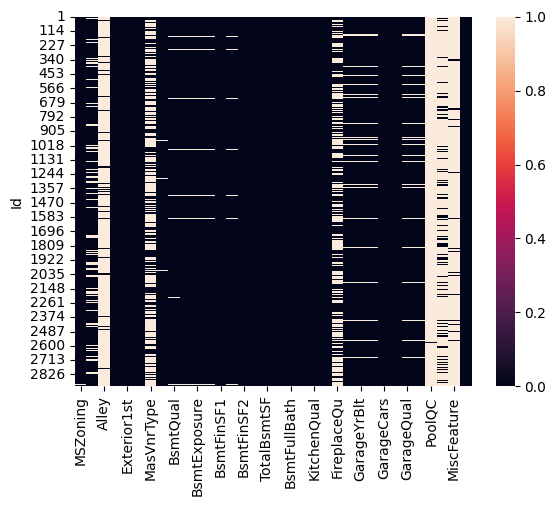

In [24]:
sns.heatmap(df_null.isnull(),cbar=True)

In [38]:
df_objects = df[df.select_dtypes(include='object').columns]
df_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis=1, inplace=True)

In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis=1, inplace=True)
df_objects = df_objects.fillna('null')

<ipython-input-39-c2445c64626d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis=1, inplace=True)


In [41]:
df_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [40]:
df_objects['Utilities'].value_counts()

,count
Utilities,
AllPub,2916
null,2
NoSeWa,1


In [43]:
df_objects_encoded = pd.get_dummies(df_objects)
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [46]:
df_objects_encoded.columns

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'MSZoning_null', 'Street_Grvl', 'Street_Pave',
       'LotShape_IR1', 'LotShape_IR2',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleType_null',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=247)

In [47]:
# looking null column in df_object_encoded dataset
for i in df_objects_encoded.columns:
  if 'null' in i:
    df_objects_encoded.drop(i,axis=1,inplace=True)
    print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [48]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
5,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [50]:
# necessory the two datset have the same rows if  axis=1 , in axis=0 they need to ave same column
new_data  =pd.concat([df ,df_objects_encoded],axis=1)
new_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,True,False,False,False,False,True,False
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,False,False,False,True,False,False,False,False,True,False
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,False,False,True,False,False,False,False,True,False
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,False,True,True,False,False,False,False,False
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,False,False,False,True,False,False,False,False,True,False


In [51]:
len(new_data.columns)

304

In [52]:
len(df.columns) , len(df_objects_encoded.columns)

(74, 230)

In [59]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 304 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(230), float64(11), int64(26), object(37)
memory usage: 2.3+ MB


In [61]:
new_df = new_data.drop(df.select_dtypes(include=['object']),axis=1)
new_df.isna().sum()[new_df.isna().sum()>0]

,0
LotFrontage,486
MasVnrArea,23
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2
GarageYrBlt,159
GarageCars,1


In [63]:
len(new_df.columns)

267

In [83]:
Mode_columns = ['GarageCars','GarageYrBlt','BsmtFullBath','BsmtHalfBath']
Mean_columns = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']

In [84]:
for i in Mode_columns:
  new_df[i].fillna(new_df[i].mode()[0],inplace=True)

for i in Mean_columns:
  new_df[i].fillna(new_df[i].mean(),inplace=True)

<ipython-input-84-f2c6048b749e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[i].fillna(new_df[i].mode()[0],inplace=True)
<ipython-input-84-f2c6048b749e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [85]:
new_df.isna().sum()[new_df.isna().sum()>0]

,0


In [131]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data.drop('SalePrice',axis=1,inplace=True)

<ipython-input-131-8540a019acec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.drop('SalePrice',axis=1,inplace=True)


In [88]:
training_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [132]:
X= training_data.drop('SalePrice',axis=1)
y= training_data['SalePrice']

In [133]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))
y_train.shape , y_test.shape

((1168, 1), (292, 1))

##Modeling

In [135]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_test)
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("r2 score : ",r2_score(y_test,y_pred))

mean squared error :  884429910.0623164
r2 score :  0.8846946158256473


In [136]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1,random_state=42)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("r2 score : ",r2_score(y_test,y_pred))

mean squared error :  636459136.0
r2 score :  0.9170231819152832


In [137]:
model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("r2 score : ",r2_score(y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


mean squared error :  838270084.8166041
r2 score :  0.8907125900289428


In [141]:
pred = model_2.predict(testing_data)

final_pred = pd.DataFrame()
final_pred['Id'] = testing_data.index
final_pred['SalePrice'] = pred
final_pred.to_csv('/content/final_submission.csv',index=False)

In [139]:
final_pred[:100]

,Id,SalePrice
0,1461,129250.039062
1,1462,157831.062500
2,1463,183618.781250
3,1464,190639.343750
4,1465,202310.562500
...,...,...
95,1556,84475.015625
96,1557,109713.570312
97,1558,92043.460938
98,1559,108622.273438


In [140]:
len(final_pred)

1459

In [129]:
final_pred[: , 1459]

InvalidIndexError: (slice(None, None, None), 1459)